In [73]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initializedz
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [94]:
from scipy.stats import norm, uniform
import numpy as np
import pandas as pd

# Process parameters
# σ^2 = 2Dt so the diffusion constants are D = 1/2 and D = 1/2 * (10)^(1/2)
sd1 = 1
sd2 = 10

n = 100
N = 10**4

# Make the dataset by generating the displacements and then taking a cumulative sum to obtain the trajectories.
x1 = uniform.rvs(scale = 50, size = (N, 1))
x2 = norm.rvs(size = (N, n-1), scale = sd1)
data1 = np.cumsum(np.concatenate((x1,x2),axis=1), axis=1)
data1 = np.concatenate((np.ones(shape = (N,1)), data1), axis=1)

x1 = uniform.rvs(scale = 50, size = (N, 1))
x2 = norm.rvs(size = (N, n-1), scale = sd2)
data2 = np.cumsum(np.concatenate((x1,x2),axis=1), axis=1)
data2 = np.concatenate((sd2*np.ones(shape = (N,1)), data2), axis=1)

df = np.concatenate((data1,data2), axis = 0)
df = pd.DataFrame(df, 
                  columns = ['diffusion_constant'] + [ 't_' + str(i) for i in range(100)],
                  #index = None
                 )

# Divide the dataset in training validation and test sets
from sklearn.model_selection import train_test_split

# This line caused problems
# df['diffusion_constant'] = df['diffusion_constant'].astype('category')
# df['diffusion_constant'] = np.where('diffusion_constant' == 1, [1,0], [0,1])

train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

12800 train examples
3200 validation examples
4000 test examples


In [95]:
df

,diffusion_constant,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
0,1.0,44.155140,43.192599,44.016088,43.801843,44.196764,43.829560,45.050783,43.538069,42.950848,...,26.503438,27.925293,28.787292,28.916834,28.750256,27.534226,27.449608,27.546485,27.996824,27.583102
1,1.0,29.779153,30.192567,29.288591,29.718428,29.097748,27.567684,27.747441,26.091880,25.049566,...,36.858062,36.751696,36.786937,36.076126,36.552007,37.535281,36.949082,36.488552,37.525602,35.676732
2,1.0,25.358019,24.003200,22.547311,23.034519,22.329471,22.118125,21.194291,20.051287,19.819477,...,24.896748,24.780978,23.425770,23.401716,24.711061,25.884265,23.334533,23.084427,23.976469,24.359290
3,1.0,23.743448,24.640573,26.812475,27.225336,25.714730,24.800041,24.530579,25.415129,27.545167,...,23.623119,24.719717,24.610103,25.287925,24.346361,24.560540,23.645439,24.556322,25.034462,25.525938
4,1.0,16.673459,17.330738,18.270306,18.771066,19.130835,21.604202,21.714024,20.882328,22.505720,...,18.245048,19.310731,21.768850,21.729058,19.997493,19.011439,18.703284,19.383704,19.745161,21.420665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10.0,43.279905,43.162678,39.557362,35.780685,46.224027,67.048775,64.289971,74.681796,85.025840,...,14.132538,11.637514,36.719073,23.507103,25.586444,32.476732,57.869942,41.623357,39.837991,13.487738
19996,10.0,44.766721,34.587516,33.992714,47.325313,38.787223,34.907588,37.256781,35.200002,19.230734,...,-86.762014,-85.646091,-87.004032,-105.295310,-122.116230,-124.800514,-140.705299,-148.570830,-156.692674,-156.578231
19997,10.0,38.174974,33.052579,17.858528,8.612351,18.787921,33.057565,30.675105,30.121293,40.475812,...,110.499771,109.953303,97.156845,95.796106,88.476895,84.759492,73.870800,65.228566,48.527408,54.604529
19998,10.0,16.145610,10.555431,13.931154,8.839974,7.470655,-0.447869,-6.113547,-11.720497,-27.026832,...,-29.651873,-30.887610,-32.568317,-50.054297,-48.210111,-45.256012,-39.890455,-56.236346,-50.646963,-57.500205


In [96]:
import tensorflow as tf

# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('diffusion_constant')
    # labels = pd.DataFrame([[0,1] if (row == 1) else [1,0] for row in labels])
    ds = tf.data.Dataset.from_tensor_slices((dataframe.values, labels.values))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

# Turn pandas dataframes into tensorflow tensor datasets
batch_size = 300 
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [97]:
# Define the neural network model

from tensorflow import keras
# from functools import partial

def leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.01)

activation = 'relu'

input = keras.Input(shape = (100, ))
reshape = tf.keras.layers.Reshape(target_shape = (100, 1, ), input_shape=(100, ))(input)

conv1 = keras.layers.Conv1D(filters = 1, input_shape = (None, 100, 1), kernel_size = 2, activation=activation)(reshape)
conv1 = keras.layers.MaxPooling1D(pool_size = 2)(conv1)

conv2 = keras.layers.Conv1D(filters = 1, input_shape = (None, 100, 1), kernel_size = 3, activation=activation)(reshape)
conv2 = keras.layers.MaxPooling1D(pool_size = 2)(conv2)

conv3 = keras.layers.Conv1D(filters = 1, input_shape = (None, 100, 1), kernel_size = 4, activation=activation)(reshape)
conv3 = keras.layers.MaxPooling1D(pool_size = 2)(conv3)

conv4 = keras.layers.Conv1D(filters = 1, input_shape = (None, 100, 1), kernel_size = 10, activation=activation)(reshape)
conv4 = keras.layers.MaxPooling1D(pool_size = 2)(conv4)

x = keras.layers.Concatenate(axis = 1)(inputs = [conv1, conv2, conv3, conv4])
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation=activation)(x)
x = keras.layers.Dense(1, activation=activation)(x)

model = keras.Model(inputs=input, outputs=x, name="diffusion")
keras.utils.plot_model(model, "my_first_model_with_shape_info.pdf", show_shapes=True)

ValueError: Cannot embed the 'pdf' image format

In [98]:
model.summary()

Model: "diffusion"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
reshape_8 (Reshape)             (None, 100, 1)       0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1d_32 (Conv1D)              (None, 99, 1)        3           reshape_8[0][0]                  
__________________________________________________________________________________________________
conv1d_33 (Conv1D)              (None, 98, 1)        4           reshape_8[0][0]                  
__________________________________________________________________________________________

In [99]:
model.compile(
    optimizer = 'adam',
#     loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = ['MeanAbsoluteError']
)

In [100]:
# Tensorboard can be used to view several aspects of the trained model. Using it in a Jupyter notebook is not recommended, since the output is small on screen. 
# %load_ext tensorboard

# # Clear any logs from previous runs
# !rm -rf ./logs/ # CHECK IF NOTHING IMPORTANT IS HERE

# import datetime
# log_dir = "logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20,
#     callbacks=[tensorboard_callback]
)

Train for 43 steps, validate for 11 steps
Epoch 1/20
43/43 [==============================] - 1s 34ms/step - loss: 58.9366 - MeanAbsoluteError: 5.5205 - val_loss: 45.9505 - val_MeanAbsoluteError: 5.1454
Epoch 2/20
43/43 [==============================] - 0s 9ms/step - loss: 44.2516 - MeanAbsoluteError: 4.9931 - val_loss: 39.8256 - val_MeanAbsoluteError: 4.6347
Epoch 3/20
43/43 [==============================] - 0s 8ms/step - loss: 34.2843 - MeanAbsoluteError: 4.1836 - val_loss: 26.0622 - val_MeanAbsoluteError: 3.3324
Epoch 4/20
43/43 [==============================] - 0s 9ms/step - loss: 19.7108 - MeanAbsoluteError: 2.9097 - val_loss: 14.4432 - val_MeanAbsoluteError: 2.4087
Epoch 5/20
43/43 [==============================] - 0s 8ms/step - loss: 10.5017 - MeanAbsoluteError: 2.0901 - val_loss: 8.5585 - val_MeanAbsoluteError: 1.8280
Epoch 6/20
43/43 [==============================] - 0s 8ms/step - loss: 7.1919 - MeanAbsoluteError: 1.7474 - val_loss: 6.1733 - val_MeanAbsoluteError: 1.5822


In [101]:
# For an in browser view in a seperate tab go to localhost:PORT_NUMBER, typically localhost:6006
# %tensorboard --logdir logs/fit

In [102]:
model.evaluate(test_ds)

14/14 [==============================] - 0s 5ms/step - loss: 1.7416 - MeanAbsoluteError: 0.8270


[1.7416154827390398, 0.82702744]

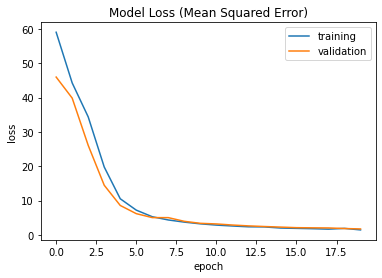

In [103]:
from matplotlib import pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Mean Squared Error)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.savefig("working_diff_not_generated_learning_curve.pdf")

In [104]:
# Print the names, sizes and layer index of the convolutional layers
for number, layer in enumerate(model.layers):
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape, " on layer: ", number)

conv1d_32 (2, 1, 1)  on layer:  2
conv1d_33 (3, 1, 1)  on layer:  3
conv1d_34 (4, 1, 1)  on layer:  4
conv1d_35 (10, 1, 1)  on layer:  5


In [113]:
# retrieve filter weights from the second hidden layer
filters, biases = model.layers[2].get_weights()
print(filters)

[[[-0.30045655]]

 [[ 0.4582819 ]]]


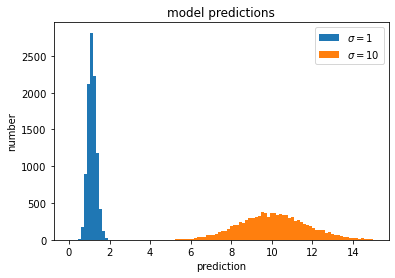

In [115]:
# Plot model predictions for all trajectories in the dataset

predictions = model.predict(df.iloc[:,1:])
plt.hist(predictions[0:10000], range = (0,15), bins = 100, label = '$\sigma=1$')
plt.hist(predictions[10000:], range = (0,15), bins = 100, label = '$\sigma = 10$')
plt.legend()
plt.title('model predictions')
plt.ylabel('number')
plt.xlabel('prediction')
plt.savefig("predictions_diff_not_generated_learning_curve.pdf")